In [53]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils

In [54]:
datos_raw = pd.read_excel("./grouped table of annotations.xlsx")#table with annotations
#datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")#operation code that relates operation with variants
glosario['General operations'] = glosario['General operations'].fillna(method='pad')#name of the operations
glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')#name of the variants
glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

columns=['case:id','case:concept:name','concept:name','Specific operation','time:timestamp','Question','Year']
#columna es el case_ID
cont = 0
df_prueba= pd.DataFrame(columns=columns)
ct=datetime.datetime.now()
for columna in datos_raw.columns:
    print("-----------------------------------------------------------------------")
    print("Case:id")
    print(columna)
    acciones_analisis=datos_raw[columna].dropna()
    for accion in acciones_analisis:
        
        accion = re.sub('[\xa0]', ' ', accion)
        print(' *************************** ', accion)
        string_dividido=accion.split(' ')
        accion = ' '.join(string_dividido)
        for fila in range(len(glosario)):
                     
            if(accion == glosario['Specific operations'][fila]):
                #print('si', accion)
                accionGeneral=glosario['General operations'][fila]
                accionEspecifica=accion
                columnaSeparada=columna.split()
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                ct=ct+datetime.timedelta(hours=1)
                print("Fecha:") 
                print(ct)
                new_row={'case:id':columna, 'case:concept:name':columna, 'concept:name':accionGeneral,'Specific operation':accionEspecifica,'time:timestamp':str(ct),'Question':pregunta,'Year':año} 
                #print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
                
            elif(accion == glosario['General operations'][fila]):
                #print('no', accion)
                accionGeneral=accion
                accionEspecifica=accion
                columnaSeparada=columna.split()
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                ct=ct+ datetime.timedelta(hours=1)
                print("Fecha:") 
                print(ct)
                new_row={'case:id':columna, 'case:concept:name':columna, 'concept:name':accionGeneral,'Specific operation':accionEspecifica,'time:timestamp':str(ct),'Question':pregunta,'Year':año} 
                #print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
df_prueba

-----------------------------------------------------------------------
Case:id
A1 P2 BPI 2020
 ***************************  Academic
 ***************************  Calculate cycle time of the whole process for all traces
Fecha:
2021-11-09 16:37:03.500187
 ***************************  Compare cycle time
Fecha:
2021-11-09 17:37:03.500187
-----------------------------------------------------------------------
Case:id
A2 P2 BPI 2020
 ***************************  Student
 ***************************  Get cycle time from the previous question
Fecha:
2021-11-09 18:37:03.500187
 ***************************  Compare cycle time
Fecha:
2021-11-09 19:37:03.500187
-----------------------------------------------------------------------
Case:id
A7 P2 BPI 2020
 ***************************  Academic
 ***************************  Calculate throughput
Fecha:
2021-11-09 20:37:03.500187
 ***************************  Comparative of throughput
Fecha:
2021-11-09 21:37:03.500187
 ***************************  C

 ***************************  Represent bar charts of cycle time
Fecha:
2021-11-13 12:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-11-13 13:37:03.500187
-----------------------------------------------------------------------
Case:id
A13 P5 BPI 2020
 ***************************  Professional
 ***************************  Represent process map with cycle time
Fecha:
2021-11-13 14:37:03.500187
 ***************************  Calculate cycle time for all pairs of events for all traces
Fecha:
2021-11-13 15:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-11-13 16:37:03.500187
-----------------------------------------------------------------------
Case:id
A18 P5 BPI 2020
 ***************************  Academic
 ***************************  Get cycle time from the previous question
Fecha:
2021-11-13 17:37:03.500187
 ******************

A7 P1 BPI 2020
 ***************************  Academic
 ***************************  Filter traces by activities
Fecha:
2021-11-18 04:37:03.500187
 ***************************  Calculate percentage of traces
Fecha:
2021-11-18 05:37:03.500187
 ***************************  Calculate number of traces
Fecha:
2021-11-18 06:37:03.500187
 ***************************  Calculate throughput
Fecha:
2021-11-18 07:37:03.500187
 ***************************  Calculate Statistics of throughput
Fecha:
2021-11-18 08:37:03.500187
 ***************************  Calculate Statistics of throughput
Fecha:
2021-11-18 09:37:03.500187
 ***************************  Calculate throughput
Fecha:
2021-11-18 10:37:03.500187
 ***************************  Calculate Statistics of throughput
Fecha:
2021-11-18 11:37:03.500187
-----------------------------------------------------------------------
Case:id
A10 P1 BPI 2020
 ***************************  Academic
 ***************************  Calculate cycle time of a fragment o

Fecha:
2021-11-22 15:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-11-22 16:37:03.500187
-----------------------------------------------------------------------
Case:id
A9 P1 BPI 2017
 ***************************  Student
 ***************************  Calculate processing time
Fecha:
2021-11-22 17:37:03.500187
 ***************************  Calculate waiting time
Fecha:
2021-11-22 18:37:03.500187
 ***************************  Compare waiting time with processing time
Fecha:
2021-11-22 19:37:03.500187
 ***************************  Calculate waiting time
Fecha:
2021-11-22 20:37:03.500187
 ***************************  Group activities by role
Fecha:
2021-11-22 21:37:03.500187
 ***************************  Calculate waiting time
Fecha:
2021-11-22 22:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-11-22 23:37:03.500187
 **********

 ***************************  Discover happy path of the process
Fecha:
2021-11-27 07:37:03.500187
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
Fecha:
2021-11-27 08:37:03.500187
 ***************************  Calculate percentage of traces
Fecha:
2021-11-27 09:37:03.500187
 ***************************  Identify sub-processes as bottlenecks applying temporal performance criteria
Fecha:
2021-11-27 10:37:03.500187
 ***************************  Represent bar charts of attributes
Fecha:
2021-11-27 11:37:03.500187
 ***************************  Identify resource associated with bottlenecks
Fecha:
2021-11-27 12:37:03.500187
 ***************************  Represent bar charts of attributes
Fecha:
2021-11-27 13:37:03.500187
 ***************************  Identify values of attributes
Fecha:
2021-11-27 14:37:03.500187
 ***************************  Calculate cycle time of the whole process for each subset of traces
Fecha:
2021-11-27 15:37:03.5

2021-12-02 17:37:03.500187
 ***************************  Compare cycle time
Fecha:
2021-12-02 18:37:03.500187
 ***************************  Represent histograms of cycle time
Fecha:
2021-12-02 19:37:03.500187
 ***************************  Represent linear tendency of cycle time
Fecha:
2021-12-02 20:37:03.500187
 ***************************  Represent histograms of cycle time
Fecha:
2021-12-02 21:37:03.500187
 ***************************  Represent linear tendency of cycle time
Fecha:
2021-12-02 22:37:03.500187
-----------------------------------------------------------------------
Case:id
A2 P2 BPI 2019
 ***************************  Student
 ***************************  Represent histograms of cycle time
Fecha:
2021-12-02 23:37:03.500187
 ***************************  Calculate cycle time of the whole process for all traces
Fecha:
2021-12-03 00:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-12-03 01:37:03.

 ***************************  Calculate percentage of traces
Fecha:
2021-12-08 03:37:03.500187
 ***************************  Filter variants depending on frequency
Fecha:
2021-12-08 04:37:03.500187
 ***************************  Represent process map with cycle time
Fecha:
2021-12-08 05:37:03.500187
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
Fecha:
2021-12-08 06:37:03.500187
-----------------------------------------------------------------------
Case:id
A16 P2 BPI 2020
 ***************************  Professional
 ***************************  Represent temporal series of traces
Fecha:
2021-12-08 07:37:03.500187
 ***************************  Identify values of attributes
Fecha:
2021-12-08 08:37:03.500187
 ***************************  Calculate Statistics of cycle time
Fecha:
2021-12-08 09:37:03.500187
 ***************************  Calculate Statistics of cycle time
Fecha:
2021-12-08 10:37:03.500187
 ***************************  Re

 ***************************  Calculate cycle time for all pairs of events for all traces
Fecha:
2021-12-12 17:37:03.500187
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
Fecha:
2021-12-12 18:37:03.500187
 ***************************  Calculate cycle time of only a subset of pairs of events for a subset of traces
Fecha:
2021-12-12 19:37:03.500187
 ***************************  Group traces by activities
Fecha:
2021-12-12 20:37:03.500187
 ***************************  Calculate cycle time of the whole process for each subset of traces
Fecha:
2021-12-12 21:37:03.500187
 ***************************  Filter traces by attributes
Fecha:
2021-12-12 22:37:03.500187
 ***************************  Calculate number of traces
Fecha:
2021-12-12 23:37:03.500187
 ***************************  Calculate number of traces
Fecha:
2021-12-13 00:37:03.500187
 ***************************  Represent bar charts of traces
Fecha:
2021-12-13 01:37:03.500187
 *

Case:id
A31 P2 BPI 2020
 ***************************  Professional
 ***************************  Compare cycle time
Fecha:
2021-12-16 06:37:03.500187
-----------------------------------------------------------------------
Case:id
A19 P4 BPI 2020
 ***************************  Professional
 ***************************  Filter traces by frequency
Fecha:
2021-12-16 07:37:03.500187
 ***************************  Group traces by activities
Fecha:
2021-12-16 08:37:03.500187
 ***************************  Represent temporal series of activities
Fecha:
2021-12-16 09:37:03.500187
 ***************************  Identify activities with cycle time
Fecha:
2021-12-16 10:37:03.500187
 ***************************  Calculate Statistics of throughput
Fecha:
2021-12-16 11:37:03.500187
 ***************************  Identify transitions by cycle time
Fecha:
2021-12-16 12:37:03.500187
 ***************************  Group traces by activities
Fecha:
2021-12-16 13:37:03.500187
 ***************************  Repres

,case:id,case:concept:name,concept:name,Specific operation,time:timestamp,Question,Year
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-09 16:37:03.500187,P2,2020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 17:37:03.500187,P2,2020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-09 18:37:03.500187,P2,2020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 19:37:03.500187,P2,2020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-09 20:37:03.500187,P2,2020
...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-18 23:37:03.500187,P1,2020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-19 00:37:03.500187,P1,2020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-19 01:37:03.500187,P1,2020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-19 02:37:03.500187,P1,2020


In [55]:
df_prueba=df_prueba.rename({'Specific operation':'Variant'},axis='columns')
df_prueba

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Year
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-09 16:37:03.500187,P2,2020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 17:37:03.500187,P2,2020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-09 18:37:03.500187,P2,2020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 19:37:03.500187,P2,2020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-09 20:37:03.500187,P2,2020
...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-18 23:37:03.500187,P1,2020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-19 00:37:03.500187,P1,2020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-19 01:37:03.500187,P1,2020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-19 02:37:03.500187,P1,2020


In [56]:
type(df_prueba.iloc[2]['time:timestamp'])

str

In [57]:
for i in range(len(df_prueba)):   
    df_prueba.iloc[i]['time:timestamp'] = datetime.datetime.strptime(df_prueba.iloc[i]['time:timestamp'], '%Y-%m-%d %H:%M:%S.%f')

In [58]:
type(df_prueba.iloc[2]['time:timestamp'])

datetime.datetime

In [59]:
#log = log_converter.apply(df_prueba)
#xes_exporter.apply(log, './Log of analysis of time aspects.xes')

In [60]:
#log2=xes_importer.apply('./Log of analysis of time aspects.xes')
#log2_df= log_converter.apply(log2,variant=log_converter.Variants.TO_DATA_FRAME)

In [61]:
#log3_df=df_prueba.rename({'concept:name': 'Operation', 'Variant': 'concept:name'},axis='columns')

In [62]:
#log3_df

In [63]:
#log3 = log_converter.apply(log3_df)
#xes_exporter.apply(log2, './Log of analysis of specific time aspects.xes')

In [64]:
df_categorias_autores=df_prueba

In [65]:
#df_categorias_autores=pd.read_csv("Log CT.csv",index_col=0)
#df_categorias_autores

In [66]:
cycleTimeOperations=["Calculate cycle time","Identify bottlenecks","Compare cycle time", "Calculate waiting time",
                     "Calculate throughput","Calculate processing time", "Compare waiting time with processing time", 
                     "Analyze cycle time depending on the events",
                     "Calculate intervals of time of the traces",
                     'Comparative of throughput','Compare processing time',]

In [67]:
manipulationOperations=[
    "Filter traces","Group traces", "Group activities","Preprocess the traces of the logs", "Filter activities",
    "Filter events","Preprocess the events of the logs", "Group organizational units", "Group events by time",
    "Filter variants depending on frequency", 'Group events by attributes','Group sub-processes', 'Filter sub-processes'
]

In [68]:
statisticOperations=[
    "Calculate number of elements", "Calculate percentages","Calculate frequency", "Calculate statistics",
    "Calculate average of activities per trace"
]

In [69]:
representationOperations=[
    "Represent process map", "Represent histograms", "Represent bar charts", "Represent scatter plot",
    "Represent heat maps", "Represent circular charts of attributes of the traces","Represent box plots of cycle time", 
    "Represent temporal series of sub-processes", "Represent density of cycle time","Discover and Replay a Log on Petri Net",
    "Represent temporal series", 'Represent boxplots of cycle time','Represent correlation graph of variables',
    'Represent heatmaps', 'Represent lineal distribution of an attribute by traces', 'Represent linear tendency of cycle time',
    'Represent scatterplot'
]

In [70]:
identificationOperations=[
    "Identify roles", "Identify resources", "Identify values of attributes", "Identify dates", 
    "Identify specific sub-processes", "Identify impact of bottlenecks by organizational unit",
    "Identify activity with biggest backlog","Identify attributes", 'Identify activities',
    'Identify attributes','Identify organizational units', 'Identify specific subprocesses',
    'Identify traces by cycle time','Identify transitions by cycle time',
]

In [71]:
otherOperations=[
    "Assign resource to each activity", "Apply machine learning techniques", "Apply decision trees",
    "Discover happy path of the process",'Discover process maps','Calculate dates of the development of activities of resources'
]

In [72]:
listTypesOperations=[]
listOthers=[]
for index, row in df_categorias_autores.iterrows():
    if row['concept:name'] in cycleTimeOperations:
        listTypesOperations.append("Analyze Cycle Time")
    elif row['concept:name'] in manipulationOperations:
        listTypesOperations.append("Manipulation")
    elif row['concept:name'] in statisticOperations:
        listTypesOperations.append("Calculate statistics")
    elif row['concept:name'] in representationOperations:
        listTypesOperations.append("Representation")
    elif row['concept:name'] in identificationOperations:
        listTypesOperations.append("Identification")
    else:
        listTypesOperations.append("Others")

In [73]:
df_categorias_autores['Type']=listTypesOperations

In [74]:
df_categorias_autores

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Year,Type
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-09 16:37:03.500187,P2,2020,Analyze Cycle Time
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 17:37:03.500187,P2,2020,Analyze Cycle Time
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-09 18:37:03.500187,P2,2020,Analyze Cycle Time
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 19:37:03.500187,P2,2020,Analyze Cycle Time
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-09 20:37:03.500187,P2,2020,Analyze Cycle Time
...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-18 23:37:03.500187,P1,2020,Manipulation
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-19 00:37:03.500187,P1,2020,Manipulation
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-19 01:37:03.500187,P1,2020,Calculate statistics
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-19 02:37:03.500187,P1,2020,Analyze Cycle Time


In [75]:
df_categorias_autores.to_csv("Log of analysis of time aspects.csv")
log = log_converter.apply(df_categorias_autores)
xes_exporter.apply(log, './Log of analysis of time aspects.xes')

exporting log, completed traces ::   0%|          | 0/126 [00:00<?, ?it/s]

In [77]:
log3_df=df_categorias_autores.rename({'concept:name': 'Operation', 'Variant': 'concept:name'},axis='columns')
log3_df.to_csv('Log of analysis of specific time aspects.csv')
log3 = log_converter.apply(log3_df)
xes_exporter.apply(log3, './Log of analysis of specific time aspects.xes')

exporting log, completed traces ::   0%|          | 0/126 [00:00<?, ?it/s]

In [110]:
tipos_op_agrupado_años=df_categorias_autores.groupby("Year")['Type'].value_counts()

In [111]:
sumAños=[tipos_op_agrupado_años[tipos_op_agrupado_años.index.get_level_values('Year')==val].sum() for val in [2015,2017,2019,2020]]

In [112]:
for index,value in tipos_op_agrupado_años.items():
    if 2015 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[0])*100
    elif 2017 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[1])*100
    elif 2019 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[2])*100
    elif 2020 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[3])*100

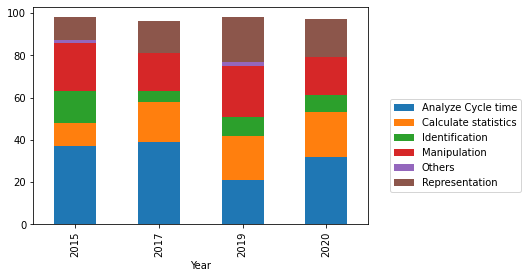

In [116]:
tipos_op_agrupado_años.unstack().plot(kind='bar', stacked=True)
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.show()

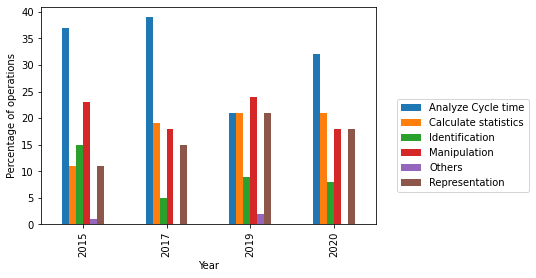

In [115]:
import matplotlib.pyplot as plt
tipos_op_agrupado_años.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.show()